<a href="https://colab.research.google.com/github/vsuwi/comp3610_groupK/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

### Reading and Cleaning oil_gas_dataset

In [2]:
oil_df=pd.read_csv("oil_gas_dataset.csv")

In [3]:
oil_df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [4]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    23024 non-null  object 
 1   Date      23024 non-null  object 
 2   Open      23024 non-null  float64
 3   High      23024 non-null  float64
 4   Low       23024 non-null  float64
 5   Close     23024 non-null  float64
 6   Volume    23024 non-null  int64  
 7   Currency  23024 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


Preprocessing decisions
- convert date to DateTime
- drop high, low and volume since our analysis does not require such details
- drop currency column since all the values are identical
- split into brent oil, crude oil and natural gas datasets

In [5]:
#convert date column to datetime
oil_df['Date'] = pd.to_datetime(oil_df['Date'], format='%Y-%m-%d')


In [6]:
#drop non-essential columns
oil_df=oil_df.drop(columns=['High','Low','Volume','Currency'])

In [7]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  23024 non-null  object        
 1   Date    23024 non-null  datetime64[ns]
 2   Open    23024 non-null  float64       
 3   Close   23024 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 719.6+ KB


In [8]:
oil_df['Symbol'].value_counts()

Symbol
Heating Oil      5770
Brent Oil        5768
Crude Oil WTI    5744
Natural Gas      5742
Name: count, dtype: int64

In [9]:
#split into separate dfs for oil and gas
brent_oil_df=oil_df[oil_df['Symbol']=='Brent Oil']
crude_oil_df=oil_df[oil_df['Symbol']=='Crude Oil WTI']
natural_gas_df=oil_df[oil_df['Symbol']=='Natural Gas']

In [10]:
brent_oil_df

,Symbol,Date,Open,Close
0,Brent Oil,2000-01-04,23.90,24.39
1,Brent Oil,2000-01-05,24.25,23.73
2,Brent Oil,2000-01-06,23.55,23.62
3,Brent Oil,2000-01-07,23.57,23.09
4,Brent Oil,2000-01-10,23.04,23.73
...,...,...,...,...
5763,Brent Oil,2022-06-13,121.94,122.27
5764,Brent Oil,2022-06-14,121.88,121.17
5765,Brent Oil,2022-06-15,120.79,118.51
5766,Brent Oil,2022-06-16,119.65,119.81


In [11]:
crude_oil_df

,Symbol,Date,Open,Close
5768,Crude Oil WTI,2000-01-04,25.20,25.55
5769,Crude Oil WTI,2000-01-05,25.50,24.91
5770,Crude Oil WTI,2000-01-06,24.80,24.78
5771,Crude Oil WTI,2000-01-07,24.65,24.22
5772,Crude Oil WTI,2000-01-10,24.22,24.67
...,...,...,...,...
11507,Crude Oil WTI,2022-06-13,120.19,120.93
11508,Crude Oil WTI,2022-06-14,121.09,118.93
11509,Crude Oil WTI,2022-06-15,119.07,115.31
11510,Crude Oil WTI,2022-06-16,115.98,117.59


In [12]:
natural_gas_df

,Symbol,Date,Open,Close
11512,Natural Gas,2000-01-04,2.130,2.176
11513,Natural Gas,2000-01-05,2.180,2.168
11514,Natural Gas,2000-01-06,2.165,2.196
11515,Natural Gas,2000-01-07,2.195,2.173
11516,Natural Gas,2000-01-10,2.180,2.216
...,...,...,...,...
17249,Natural Gas,2022-06-13,8.920,8.609
17250,Natural Gas,2022-06-14,8.686,7.189
17251,Natural Gas,2022-06-15,7.269,7.420
17252,Natural Gas,2022-06-16,7.540,7.464


### Reading and Cleaning sectoral_gdp dataset

In [13]:
gdp_df=pd.read_csv("sectoral_gdp.csv")

In [14]:
gdp_df.head()

,Quarter/Year,Unnamed: 1,2012-1,2012-2,2012-3,2012-4,2013-1,2013-2,2013-3,2013-4,...,2021-1,2021-2,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4,2023-1,2023-2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Industry,ISIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Agriculture, forestry and fishing",A,289.5,282.1,284.0,287.5,279.9,270.3,269.8,271.5,...,256.4,238.6,219.5,218.7,204.5,208.5,196.3,204.7,196.2,205.2
3,Mining and quarrying,B,"9,212.6","8,893.6","8,773.2","8,486.3","9,024.4","9,047.8","9,031.8","8,871.1",...,"5,901.5","5,708.6","5,589.9","5,669.7","5,573.5","5,683.4","6,079.8","5,670.9","5,630.0","5,572.6"
4,Manufacturing,C,"7,888.0","7,847.7","7,768.4","7,030.1","7,692.1","7,710.2","7,516.2","7,537.2",...,"5,980.1","6,066.7","6,100.6","6,169.4","6,308.3","6,324.1","6,572.4","6,419.2","6,189.8","6,276.9"


In [15]:
gdp_df=gdp_df.transpose()

In [16]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Quarter/Year to 2023-2
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
 1   1       2 non-null      object
 2   2       48 non-null     object
 3   3       48 non-null     object
 4   4       48 non-null     object
 5   5       1 non-null      object
 6   6       48 non-null     object
 7   7       48 non-null     object
 8   8       48 non-null     object
 9   9       48 non-null     object
 10  10      48 non-null     object
 11  11      48 non-null     object
 12  12      48 non-null     object
 13  13      48 non-null     object
 14  14      48 non-null     object
 15  15      48 non-null     object
 16  16      48 non-null     object
 17  17      48 non-null     object
 18  18      48 non-null     object
 19  19      1 non-null      object
 20  20      48 non-null     object
 21  21      48 non-null     object
 22  22      48 non-nul

In [17]:
gdp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Quarter/Year,NaN,Industry,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Of which:,"Food, beverages and tobacco products","Textiles, clothing, leather, wood, paper and p...",Petroleum and chemical products,Other manufactured products,...,Of which,Crude Oil Exploration & Extraction,Condensate Extraction,Natural Gas Exploration & Extraction,Asphalt,Petroleum support services,Refining (incl. LNG),Manufacture of Petrochemicals,Petroleum and natural gas distribution,Source: Central Statistical Office
Unnamed: 1,NaN,ISIC,A,B,C,NaN,CA,CB-C,CD-E,CF-M,...,NaN,B1,B2,B3,B4,B5,C1,C2,G1,NaN
2012-1,NaN,NaN,289.5,"9,212.6","7,888.0",NaN,"1,199.1",231.6,"5,959.2",498.1,...,NaN,"3,027.1","1,344.6","4,074.5",55.2,679.2,"2,638.6","3,091.3","1,290.3",NaN
2012-2,NaN,NaN,282.1,"8,893.6","7,847.7",NaN,"1,200.2",280.6,"5,811.6",555.3,...,NaN,"3,182.4","1,100.6","3,924.4",55.2,630.4,"2,607.8","3,027.3","1,297.9",NaN
2012-3,NaN,NaN,284.0,"8,773.2","7,768.4",NaN,"1,227.5",263.9,"5,744.2",532.8,...,NaN,"3,188.1",970.9,"4,083.1",55.2,447.1,"2,611.7","2,932.7","1,283.5",NaN


Preprocessing decisions are based on the following observations
- The first row of this dataset contains industry labels.
- The second row is a code for each industry.
- There are many NaN columns (0,1,5,19,31,40).
- Multi-letter codes (row 2) contain a combination of industry products. Our research focuses on the contribution of individual sectors. Thus these rows are not needed.

In [18]:
gdp_clean=gdp_df.copy()

In [19]:
#extract dates column 
dates=pd.DataFrame(gdp_clean[0])
dates.info()
print(dates.head())
print(dates.iloc[5])


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Quarter/Year to 2023-2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
dtypes: object(1)
memory usage: 1.8+ KB
                0
Quarter/Year  NaN
Unnamed: 1    NaN
2012-1        NaN
2012-2        NaN
2012-3        NaN
0    NaN
Name: 2012-4, dtype: object


In [20]:
#clean dates data
years=[]
quarters=[]
for i in range(2,len(dates)):
    date=dates.iloc[i].name

    #convert to string and remove trailing whitespace
    date=str(date).strip()

    #split into year and quarter
    year, quarter = date.split("-")
    years.append(int(year))
    quarters.append(int(quarter))

dates_df=pd.DataFrame({'Year':years, 'Quarter':quarters})
dates_df.head()


,Year,Quarter
0,2012,1
1,2012,2
2,2012,3
3,2012,4
4,2013,1


In [21]:
# set column names to industry
gdp_clean.columns=gdp_clean.iloc[0]
gdp_clean=gdp_clean[1:]



In [22]:
#extract and clean total gdp column
total_gdp=gdp_clean['GDP at basic prices']
values=[]

for val in total_gdp[1:]:   #exclude nan in first row
    amount=float(val.replace(",",""))
    values.append(amount)

total_gdp_df=pd.DataFrame({'Total GDP':values})
total_gdp_df.head()

,Total GDP
0,41793.4
1,42040.3
2,42450.8
3,41692.8
4,42009.3


In [23]:
#extract and clean industry columns
industries=[]
values=[]
for col in gdp_clean.columns:
    data=gdp_clean[col].iloc[0]
    data=str(data).strip()
    if len(data)==1:
        industries.append(col)

industries_df=pd.DataFrame(gdp_clean[industries][1:])


industries_df = industries_df.reset_index(drop=True)
industries_df


Quarter/Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity and gas,Water supply and sewerage,Construction,Trade and repairs,Transport and storage,Accommodation and food services,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical services",Administrative and support services,Public administration,Education,Human health and social work,"Arts, entertainment and recreation",Other service activities,Domestic services
0,289.5,"9,212.6","7,888.0","1,309.3",512.3,"2,155.9","9,179.4","1,314.3",563.6,945.3,"2,333.3",753.3,604.0,779.6,"2,687.4",903.4,147.4,94.4,80.5,39.8
1,282.1,"8,893.6","7,847.7","1,299.3",509.3,"2,199.7","9,855.2","1,316.1",523.3,956.9,"2,304.2",754.7,544.2,801.2,"2,682.8",905.4,147.1,94.1,83.2,40.0
2,284.0,"8,773.2","7,768.4","1,327.9",513.2,"2,216.4","10,018.6","1,501.2",546.6,974.9,"2,329.7",756.6,602.5,856.3,"2,701.3",914.3,147.9,94.7,82.9,40.1
3,287.5,"8,486.3","7,030.1","1,229.4",522.3,"2,037.7","10,746.8","1,234.4",506.4,981.3,"2,360.5",757.4,619.1,921.5,"2,686.9",917.6,147.7,94.5,85.4,40.3
4,279.9,"9,024.4","7,692.1","1,329.9",485.1,"2,246.7","9,442.0","1,455.2",555.3,978.9,"2,339.3",760.1,446.9,"1,020.8","2,658.4",924.4,148.0,94.7,87.0,40.4
5,270.3,"9,047.8","7,710.2","1,308.6",493.5,"2,383.2","9,883.0","1,331.6",544.9,986.0,"2,145.8",760.9,647.5,"1,076.0","2,673.1",926.1,148.4,95.0,84.5,40.5
6,269.8,"9,031.8","7,516.2","1,296.0",511.6,"2,241.9","10,722.2","1,544.6",558.0,"1,002.8","2,174.6",772.3,683.5,"1,090.1","2,688.7",934.9,148.5,95.0,84.3,40.7
7,271.5,"8,871.1","7,537.2","1,350.7",500.8,"2,237.0","12,896.0","1,612.0",522.6,"1,030.6","2,174.3",769.1,712.7,"1,051.5","2,748.0",938.3,148.6,95.1,87.0,40.8
8,256.5,"8,787.9","7,451.5","1,374.4",473.2,"2,305.2","11,239.8","1,438.1",520.9,"1,003.8","2,203.9",772.2,698.5,973.3,"2,737.0",945.4,148.6,95.1,85.5,40.9
9,256.1,"8,776.8","7,495.6","1,292.5",450.1,"2,239.0","12,385.1","1,439.9",531.5,"1,020.1","2,226.9",775.3,668.4,929.2,"2,770.8",949.9,148.9,95.3,85.1,41.1


In [24]:
#remove commas and spaces from currency data
for row in range(0,len(industries_df)):
    for col in range(0,len(industries_df.columns)):
        value=industries_df.iloc[row,col].strip()
        cleaned=value.replace(",","")
        industries_df.iloc[row,col]=cleaned
        


In [25]:
industries_df.head()

Quarter/Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity and gas,Water supply and sewerage,Construction,Trade and repairs,Transport and storage,Accommodation and food services,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical services",Administrative and support services,Public administration,Education,Human health and social work,"Arts, entertainment and recreation",Other service activities,Domestic services
0,289.5,9212.6,7888.0,1309.3,512.3,2155.9,9179.4,1314.3,563.6,945.3,2333.3,753.3,604.0,779.6,2687.4,903.4,147.4,94.4,80.5,39.8
1,282.1,8893.6,7847.7,1299.3,509.3,2199.7,9855.2,1316.1,523.3,956.9,2304.2,754.7,544.2,801.2,2682.8,905.4,147.1,94.1,83.2,40.0
2,284.0,8773.2,7768.4,1327.9,513.2,2216.4,10018.6,1501.2,546.6,974.9,2329.7,756.6,602.5,856.3,2701.3,914.3,147.9,94.7,82.9,40.1
3,287.5,8486.3,7030.1,1229.4,522.3,2037.7,10746.8,1234.4,506.4,981.3,2360.5,757.4,619.1,921.5,2686.9,917.6,147.7,94.5,85.4,40.3
4,279.9,9024.4,7692.1,1329.9,485.1,2246.7,9442.0,1455.2,555.3,978.9,2339.3,760.1,446.9,1020.8,2658.4,924.4,148.0,94.7,87.0,40.4


In [26]:
#convert df to float
industries_df=industries_df.astype(float)
industries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Agriculture, forestry and fishing                46 non-null     float64
 1   Mining and quarrying                             46 non-null     float64
 2   Manufacturing                                    46 non-null     float64
 3   Electricity and gas                              46 non-null     float64
 4   Water supply and sewerage                        46 non-null     float64
 5   Construction                                     46 non-null     float64
 6   Trade and repairs                                46 non-null     float64
 7   Transport and storage                            46 non-null     float64
 8   Accommodation and food services                  46 non-null     float64
 9   Information and communication     

In [27]:
#combine date(year/quarter), industry values, totals
gdp_clean=pd.concat([dates_df,industries_df,total_gdp_df], axis=1)
gdp_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             46 non-null     int64  
 1   Quarter                                          46 non-null     int64  
 2   Agriculture, forestry and fishing                46 non-null     float64
 3   Mining and quarrying                             46 non-null     float64
 4   Manufacturing                                    46 non-null     float64
 5   Electricity and gas                              46 non-null     float64
 6   Water supply and sewerage                        46 non-null     float64
 7   Construction                                     46 non-null     float64
 8   Trade and repairs                                46 non-null     float64
 9   Transport and storage             

The cleaned datasets are as follows
- Oil and Gas: brent_oil_df, crude_oil_df, natural_gas_df
- Sectoral GDP: gdp_clean

#Visualization

In [32]:
# sectoral gdp test
gdp_clean.head(10)

,Year,Quarter,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,Electricity and gas,Water supply and sewerage,Construction,Trade and repairs,Transport and storage,...,Real estate activities,"Professional, scientific and technical services",Administrative and support services,Public administration,Education,Human health and social work,"Arts, entertainment and recreation",Other service activities,Domestic services,Total GDP
0,2012,1,289.5,9212.6,7888.0,1309.3,512.3,2155.9,9179.4,1314.3,...,753.3,604.0,779.6,2687.4,903.4,147.4,94.4,80.5,39.8,41793.4
1,2012,2,282.1,8893.6,7847.7,1299.3,509.3,2199.7,9855.2,1316.1,...,754.7,544.2,801.2,2682.8,905.4,147.1,94.1,83.2,40.0,42040.3
2,2012,3,284.0,8773.2,7768.4,1327.9,513.2,2216.4,10018.6,1501.2,...,756.6,602.5,856.3,2701.3,914.3,147.9,94.7,82.9,40.1,42450.8
3,2012,4,287.5,8486.3,7030.1,1229.4,522.3,2037.7,10746.8,1234.4,...,757.4,619.1,921.5,2686.9,917.6,147.7,94.5,85.4,40.3,41692.8
4,2013,1,279.9,9024.4,7692.1,1329.9,485.1,2246.7,9442.0,1455.2,...,760.1,446.9,1020.8,2658.4,924.4,148.0,94.7,87.0,40.4,42009.3
5,2013,2,270.3,9047.8,7710.2,1308.6,493.5,2383.2,9883.0,1331.6,...,760.9,647.5,1076.0,2673.1,926.1,148.4,95.0,84.5,40.5,42556.9
6,2013,3,269.8,9031.8,7516.2,1296.0,511.6,2241.9,10722.2,1544.6,...,772.3,683.5,1090.1,2688.7,934.9,148.5,95.0,84.3,40.7,43407.5
7,2013,4,271.5,8871.1,7537.2,1350.7,500.8,2237.0,12896.0,1612.0,...,769.1,712.7,1051.5,2748.0,938.3,148.6,95.1,87.0,40.8,45595.1
8,2014,1,256.5,8787.9,7451.5,1374.4,473.2,2305.2,11239.8,1438.1,...,772.2,698.5,973.3,2737.0,945.4,148.6,95.1,85.5,40.9,43551.8
9,2014,2,256.1,8776.8,7495.6,1292.5,450.1,2239.0,12385.1,1439.9,...,775.3,668.4,929.2,2770.8,949.9,148.9,95.3,85.1,41.1,44577.4


In [ ]:

concat_frame = pd.concat([gdp_clean['Year'], gdp_clean['Quarter'], gdp_clean['Total GDP']], axis=1)
concat_frame

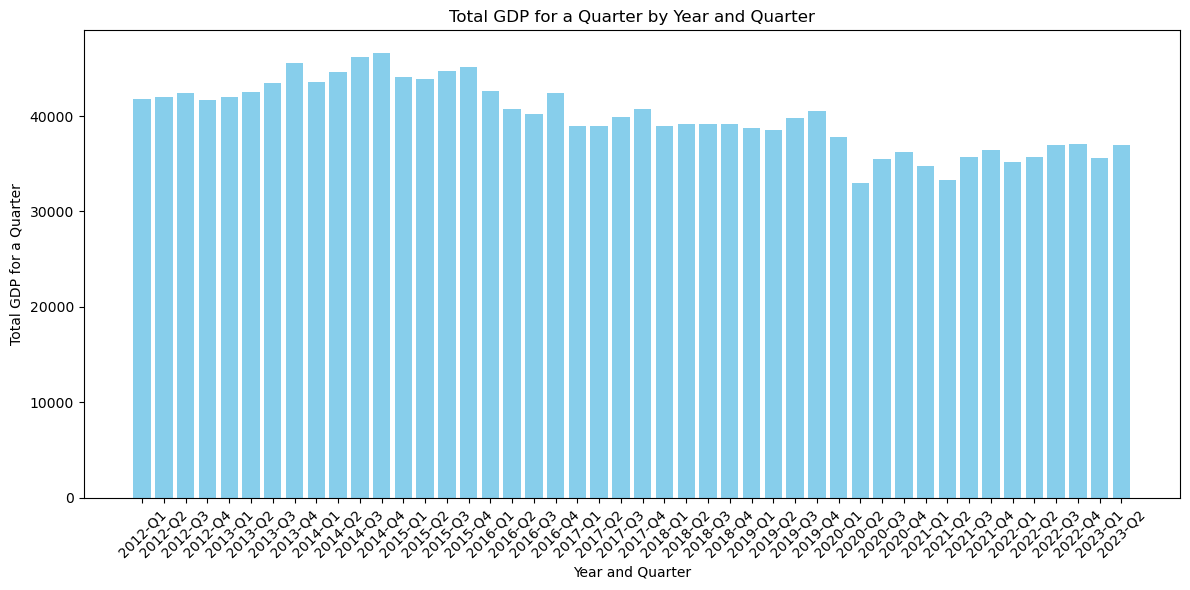

In [66]:
concat_frame['Year_Quarter'] = gdp_clean['Year'].astype(str) + '-Q' + gdp_clean['Quarter'].astype(str)
yearly_gdp = concat_frame.groupby('Year_Quarter')['Total GDP'].sum()

gdp_by_year_quarter = pd.DataFrame({'Year_Quarter': yearly_gdp.index, 'Total_GDP': yearly_gdp.values})

plt.figure(figsize=(12, 6))
plt.bar(gdp_by_year_quarter['Year_Quarter'], gdp_by_year_quarter['Total_GDP'], color='skyblue')

# Adding labels and title
plt.xlabel('Year and Quarter')
plt.ylabel('Total GDP for a Quarter')
plt.title('Total GDP for a Quarter by Year and Quarter')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### Getting Country Codes from

In [28]:
countries=pd.read_csv("countries.csv")
countries.info()

FileNotFoundError: [Errno 2] No such file or directory: 'countries.csv'

In [ ]:
latin=[]


for index, country in countries.iterrows():
  if country['Region']=="Latin America & Caribbean":
      latin.append(country['Country Code'])


print(latin)

['ABW', 'ARG', 'ATG', 'BHS', 'BLZ', 'BOL', 'BRA', 'BRB', 'CHL', 'COL', 'CRI', 'CUB', 'CUW', 'CYM', 'DMA', 'DOM', 'ECU', 'GRD', 'GTM', 'GUY', 'HND', 'HTI', 'JAM', 'KNA', 'LCA', 'MAF', 'MEX', 'NIC', 'PAN', 'PER', 'PRI', 'PRY', 'SLV', 'SUR', 'SXM', 'TCA', 'TTO', 'URY', 'VCT', 'VEN', 'VGB', 'VIR']


###Extracting the GDPS for all latin american and Caribbean Countries

In [ ]:
gdp_countries=pd.read_csv("gdp_countries.csv",skiprows=4)
gdp_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            124 non-null    float64
 6   1962            128 non-null    float64
 7   1963            128 non-null    float64
 8   1964            128 non-null    float64
 9   1965            128 non-null    float64
 10  1966            136 non-null    float64
 11  1967            139 non-null    float64
 12  1968            140 non-null    float64
 13  1969            143 non-null    float64
 14  1970            141 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

###Extracting rows, with just latin america info
##Droping the 1960 column because its empty


In [ ]:
gdp_countries=gdp_countries.drop('1960', axis=1)
gdp_countries=gdp_countries.drop('Indicator Code', axis=1)
gdp_countries=gdp_countries.drop('Indicator Name', axis=1)
gdp_countries


,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.586575,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317,NaN
1,Africa Eastern and Southern,AFE,0.254876,7.965827,5.148206,4.579317,5.346211,3.935915,5.260547,4.010711,...,4.007577,2.965062,2.219015,2.571941,2.491355,2.040617,-2.799038,4.300441,3.435138,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN,NaN
3,Africa Western and Central,AFW,1.857727,3.772943,7.277246,5.412950,4.084749,-1.776355,-9.549550,1.458912,...,5.926266,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.348803,5.916232,5.571775,4.825656,3.406631,4.756801,-5.340275,10.745657,5.218604,NaN
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,3.844734,6.177931,7.373709,7.939609,6.122798,4.438386,7.196523,4.153373,...,1.413826,1.321862,0.664552,1.157947,1.556784,0.259936,-5.963358,4.703062,1.910406,NaN
264,Zambia,ZMB,1.361382,-2.490839,3.272393,12.214048,16.647456,-5.570310,7.919697,1.248330,...,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,6.234922,5.249622,NaN


In [ ]:
latin_gdp=[]
for index, rows in gdp_countries.iterrows():
  if rows['Country Code'] in latin:
      latin_gdp.append(rows)

print(latin_gdp)

[Country Name        Aruba
Country Code          ABW
1961                  NaN
1962                  NaN
1963                  NaN
                  ...    
2019            -2.302837
2020            -23.98258
2021            27.639357
2022            10.458317
Unnamed: 67           NaN
Name: 0, Length: 65, dtype: object, Country Name    Argentina
Country Code          ARG
1961             5.427843
1962            -0.852022
1963            -5.308197
                  ...    
2019            -2.000861
2020            -9.900485
2021             10.71801
2022              4.95637
Unnamed: 67           NaN
Name: 9, Length: 65, dtype: object, Country Name    Antigua and Barbuda
Country Code                    ATG
1961                            NaN
1962                            NaN
1963                            NaN
                       ...         
2019                       3.100445
2020                     -18.880399
2021                       8.191718
2022                       9.51